<a href="https://colab.research.google.com/github/dasog94/PresumptionofMontlyRent/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


#한글 글꼴 추가

In [2]:
# 나눔 고딕 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [4]:
# 런타임 재시작을 해준다.

#Libs

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Load Data

In [9]:
df = pd.read_csv('/content/gdrive/My Drive/recommend_system/tracer/월세데이터.csv', encoding='CP949')

In [10]:
# 오리지널 df 확인용
# df_original = pd.read_csv('/content/gdrive/My Drive/recommend_system/tracer/월세데이터.csv', encoding='CP949')
# df_original[df_original['공시가격'] > 250000000].head(20)

In [11]:
# df = df.reindex(columns = df.columns.tolist() + ['1m당_가격'])
# for i in range(len(df)):
#   df.loc[i, '1m당_가격'] = df.loc[i, '보증금->월세'] / df.loc[i, '전용면적']

In [12]:
df = df.loc[:, ['법정동명', '건축년도', '층', '보증금(만원)', '계약년월', '전월세구분', '전용면적', '공시가격', '보증금->월세']]
df = df.dropna(axis=0)

In [13]:
len(df)

918

In [14]:
df.head(10)

,법정동명,건축년도,층,보증금(만원),계약년월,전월세구분,전용면적,공시가격,보증금->월세,1m당_가격
0,서울특별시 종로구 동숭동,1999,3,20000.0,201804,전세,57.96,162000000.0,66.666667,1.150219
1,서울특별시 종로구 동숭동,1999,6,22000.0,201910,전세,59.34,158000000.0,73.333333,1.235816
2,서울특별시 종로구 동숭동,1997,4,13000.0,201806,전세,47.20,122000000.0,43.333333,0.918079
3,서울특별시 종로구 동숭동,1997,4,14000.0,201712,전세,38.54,98500000.0,46.666667,1.210863
4,서울특별시 종로구 동숭동,1994,2,25000.0,201802,전세,54.02,136000000.0,83.333333,1.542639
5,서울특별시 종로구 동숭동,1994,1,20000.0,201803,전세,34.56,80700000.0,66.666667,1.929012
6,서울특별시 종로구 동숭동,1994,2,33000.0,201807,전세,54.02,136000000.0,110.000000,2.036283
7,서울특별시 종로구 동숭동,2014,1,1000.0,201806,월세,15.51,61400000.0,48.333333,3.116269
8,서울특별시 종로구 동숭동,1998,2,7000.0,201801,월세,25.60,62500000.0,48.333333,1.888021
9,서울특별시 종로구 동숭동,1998,4,9000.0,201808,월세,25.60,62500000.0,40.000000,1.562500


In [15]:
df.dtypes

법정동명        object
건축년도         int64
층            int64
보증금(만원)    float64
계약년월         int64
전월세구분       object
전용면적       float64
공시가격       float64
보증금->월세    float64
1m당_가격     float64
dtype: object

In [16]:
#deleting points
df = df.drop(df[df['전용면적'] > 40].index)
print(len(df))

379


# One-hot Encoding

In [17]:
one_hot_list = ['법정동명', '전월세구분'] 

for col_name in one_hot_list:
  tmp = pd.get_dummies(df[col_name])
  df = pd.concat([df, tmp], axis = 1)
  df = df.drop(col_name, axis=1)


In [18]:
df.head(10)

,건축년도,층,보증금(만원),계약년월,전용면적,공시가격,보증금->월세,1m당_가격,서울특별시 성북구 성북동1가,서울특별시 종로구 동숭동,서울특별시 종로구 명륜1가,서울특별시 종로구 명륜2가,서울특별시 종로구 명륜3가,서울특별시 종로구 명륜4가,서울특별시 종로구 혜화동,월세,전세
3,1997,4,14000.0,201712,38.54,98500000.0,46.666667,1.210863,0,1,0,0,0,0,0,0,1
5,1994,1,20000.0,201803,34.56,80700000.0,66.666667,1.929012,0,1,0,0,0,0,0,0,1
7,2014,1,1000.0,201806,15.51,61400000.0,48.333333,3.116269,0,1,0,0,0,0,0,1,0
8,1998,2,7000.0,201801,25.60,62500000.0,48.333333,1.888021,0,1,0,0,0,0,0,1,0
9,1998,4,9000.0,201808,25.60,62500000.0,40.000000,1.562500,0,1,0,0,0,0,0,1,0
10,1999,5,13000.0,201808,32.61,81300000.0,43.333333,1.328836,0,1,0,0,0,0,0,0,1
14,2001,5,3000.0,201802,23.79,65500000.0,60.000000,2.522068,0,1,0,0,0,0,0,1,0
15,2001,3,3000.0,201810,23.79,65500000.0,60.000000,2.522068,0,1,0,0,0,0,0,1,0
18,2003,4,2000.0,201801,36.59,101000000.0,76.666667,2.095290,0,1,0,0,0,0,0,1,0
24,2003,3,9500.0,201803,34.78,93000000.0,46.666667,1.341767,0,1,0,0,0,0,0,1,0


#보증금 -> 월세 / 1m^2당 가격

In [ ]:
df['보증금->월세'].describe()

count    364.000000
mean      55.929029
std       20.968392
min       13.333333
25%       40.000000
50%       55.833333
75%       68.333333
max      140.000000
Name: 보증금->월세, dtype: float64

In [ ]:
df['1m당_가격'].describe()

count    364.000000
mean       2.321925
std        1.116093
min        0.400040
25%        1.470763
50%        2.034298
75%        3.042859
max        5.376344
Name: 1m당_가격, dtype: float64

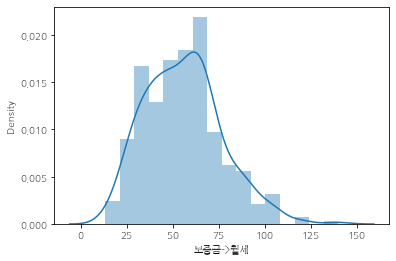

In [ ]:
sns.distplot(df['보증금->월세']);

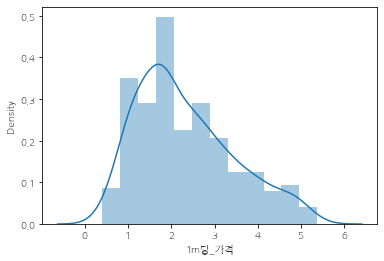

In [ ]:
sns.distplot(df['1m당_가격']);

In [ ]:
#skewness and kurtosis
print("Skewness: {}".format(df['보증금->월세'].skew()))
print("Kurtosis: {}".format(df['보증금->월세'].kurt()))

Skewness: 0.5207112446646254
Kurtosis: 0.3500643576722031


In [ ]:
#skewness and kurtosis
print("Skewness: {}".format(df['1m당_가격'].skew()))
print("Kurtosis: {}".format(df['1m당_가격'].kurt()))

Skewness: 0.6757538139129758
Kurtosis: -0.3043628049603244


#산포도(공시가격, 1m당_가격)

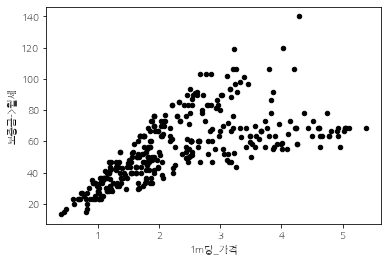

In [ ]:
x_axis = '1m당_가격'
y_axis = '보증금->월세'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

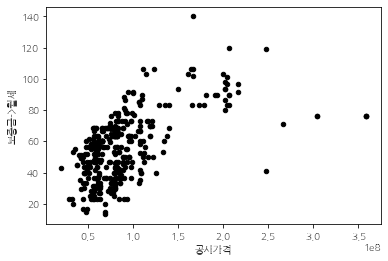

In [ ]:
x_axis = '공시가격'
y_axis = '보증금->월세'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

In [ ]:
#deleting points
df = df.drop(df[df['공시가격'] > 2500000000].index)

In [ ]:
df[df['공시가격'] > 250000000].head()

,법정동명,건축년도,층,보증금(만원),계약년월,전월세구분,거주타입,전용면적,공시가격,보증금->월세,1m당_가격,log_보증금->월세,log_공시가격
539,서울특별시 종로구 명륜2가,2019,6,1000.0,201907,월세,아파트&오피스텔,39.83,358000000.0,76.333333,1.916478,4.335110,19.696044
540,서울특별시 종로구 명륜2가,2019,9,1000.0,201907,월세,아파트&오피스텔,39.83,358000000.0,76.333333,1.916478,4.335110,19.696044
608,서울특별시 종로구 명륜2가,2019,5,1000.0,202001,월세,아파트&오피스텔,39.83,358000000.0,76.333333,1.916478,4.335110,19.696044
610,서울특별시 종로구 명륜2가,2019,10,1000.0,202003,월세,아파트&오피스텔,28.68,266000000.0,71.333333,2.487215,4.267364,19.399007
611,서울특별시 종로구 명륜2가,2019,4,1000.0,202002,월세,아파트&오피스텔,33.24,304000000.0,76.333333,2.296430,4.335110,19.532538


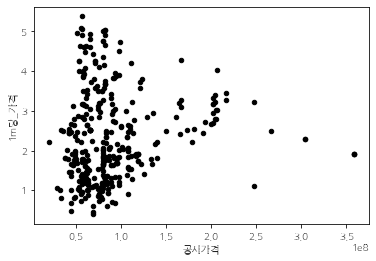

In [ ]:
x_axis = '공시가격'
y_axis = '1m당_가격'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

#산포도(전용면적)

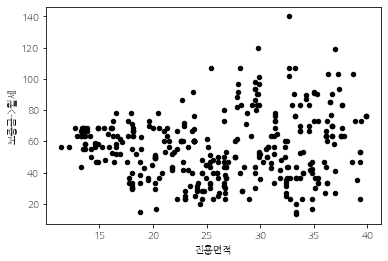

In [ ]:
x_axis = '전용면적'
y_axis = '보증금->월세'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

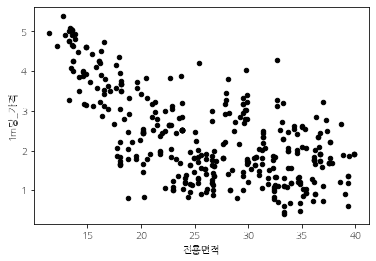

In [ ]:
x_axis = '전용면적'
y_axis = '1m당_가격'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

#산포도(보증금)

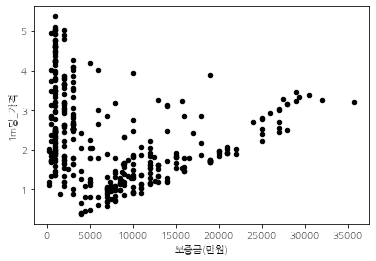

In [ ]:
x_axis = '보증금(만원)'
y_axis = '1m당_가격'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

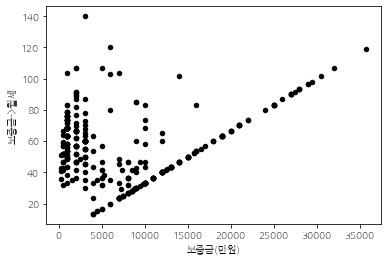

In [ ]:
x_axis = '보증금(만원)'
y_axis = '보증금->월세'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
data.plot.scatter(x=x_axis, y=y_axis, c=np.array([0, 0, 0]).reshape(1,-1));

#산포도(3가지 거리)

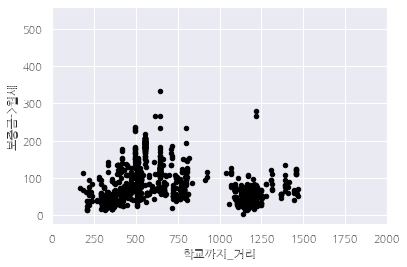

In [ ]:
#scatter plot '공시가격'/'보증금->월세'
var = '학교까지_거리'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', xlim=(0, 2000), c=np.array([0, 0, 0]).reshape(1,-1));

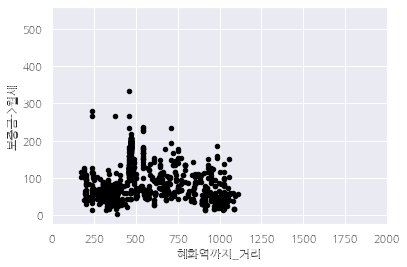

In [ ]:
#scatter plot '공시가격'/'보증금->월세'
var = '혜화역까지_거리'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', xlim=(0, 2000), c=np.array([0, 0, 0]).reshape(1,-1));

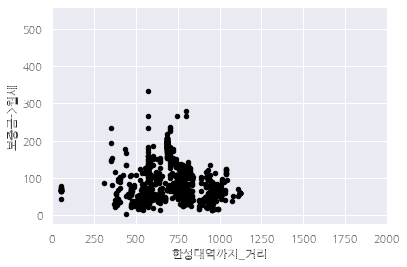

In [ ]:
#scatter plot '공시가격'/'보증금->월세'
var = '한성대역까지_거리'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', xlim=(0, 2000), c=np.array([0, 0, 0]).reshape(1,-1));

# 상자 수염 그림 (전세/월세)

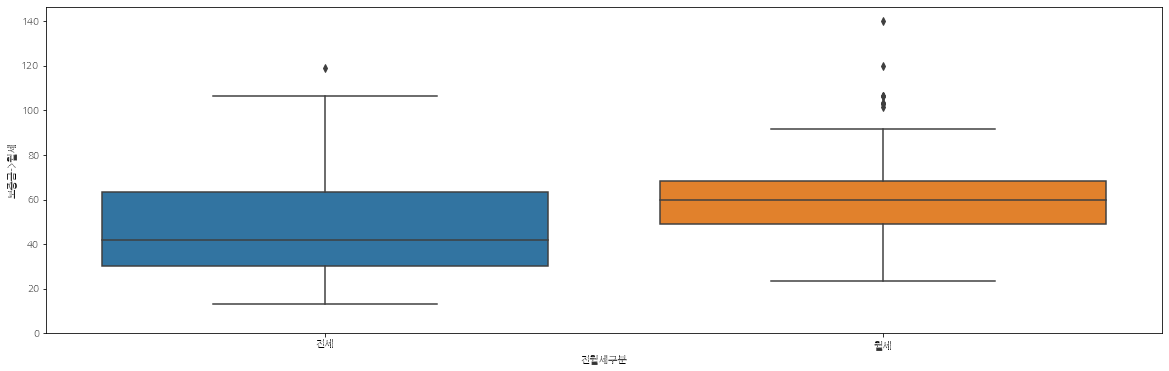

In [ ]:
var = '전월세구분'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

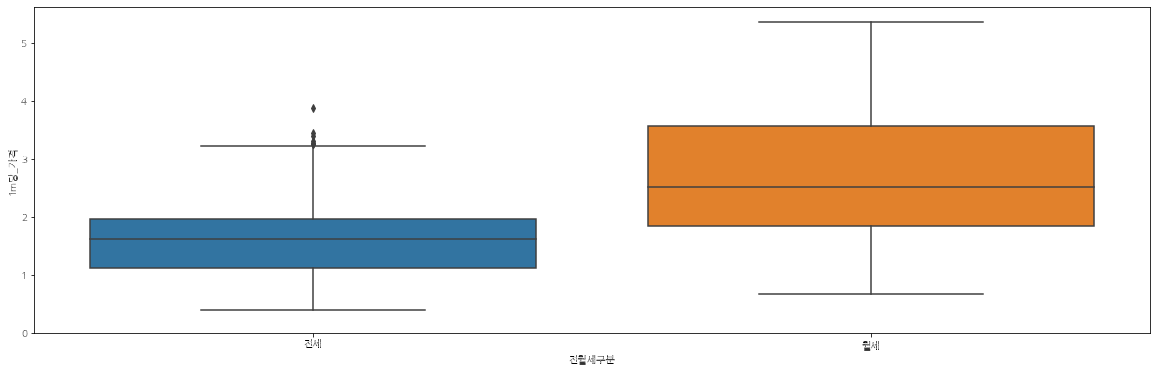

In [ ]:
#box plot overallqual/saleprice
var = '전월세구분'
data = pd.concat([df['1m당_가격'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="1m당_가격", data=data)
fig.axis(ymin=0);

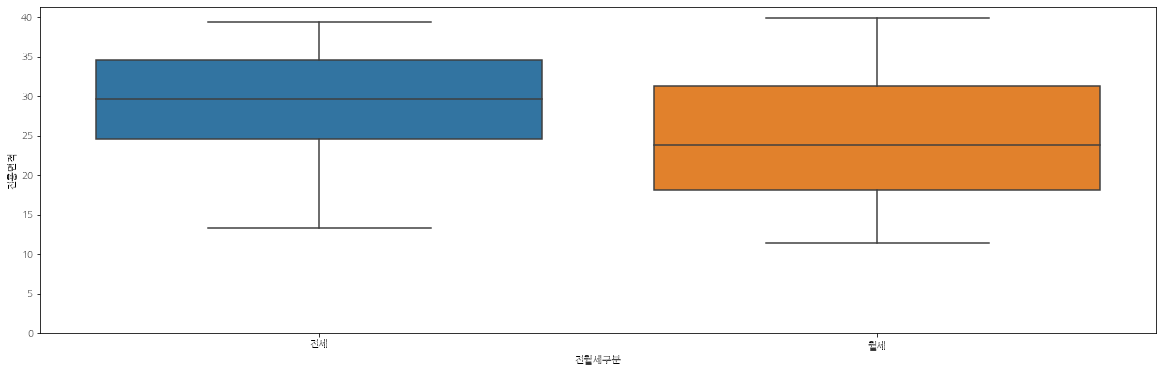

In [ ]:
#box plot overallqual/saleprice
var = '전월세구분'
data = pd.concat([df['전용면적'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="전용면적", data=data)
fig.axis(ymin=0);

# 상자 수염 그림 (법정동명)

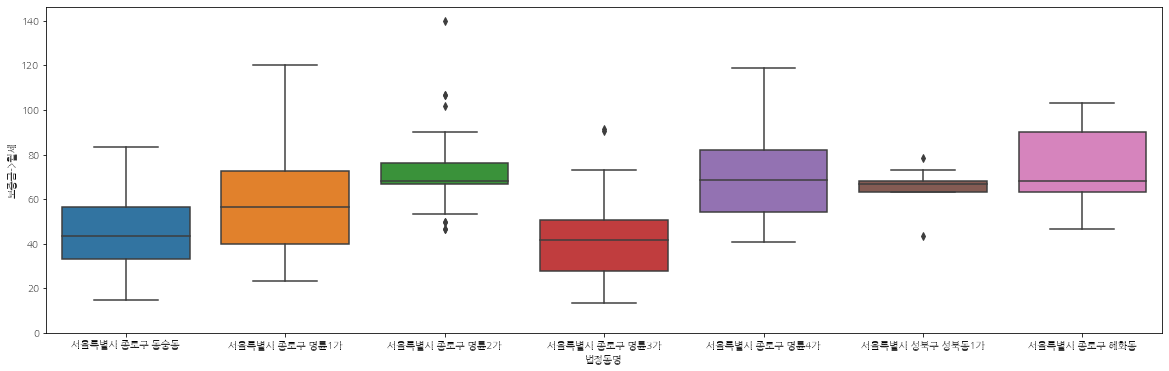

In [ ]:
var = '법정동명'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

# 상자 수염 그림 (층, 전월세구분, 거주타입, 계약년월)

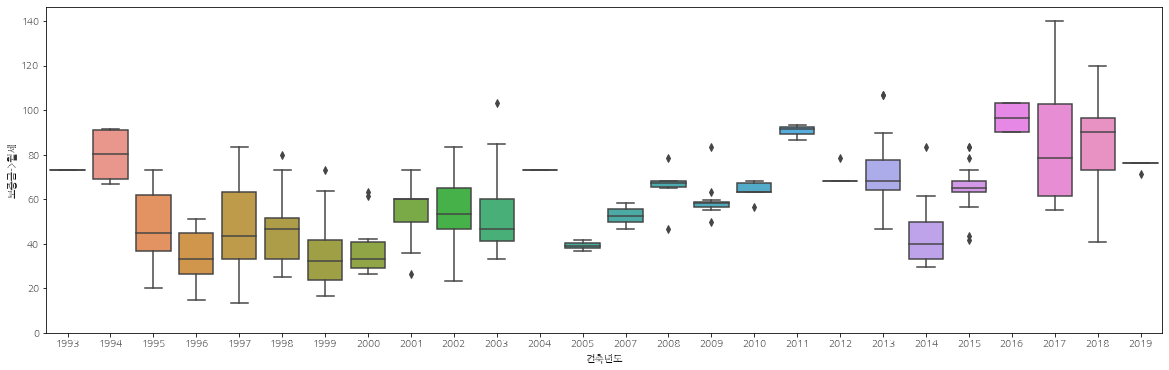

In [ ]:
#box plot overallqual/saleprice
var = '건축년도'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

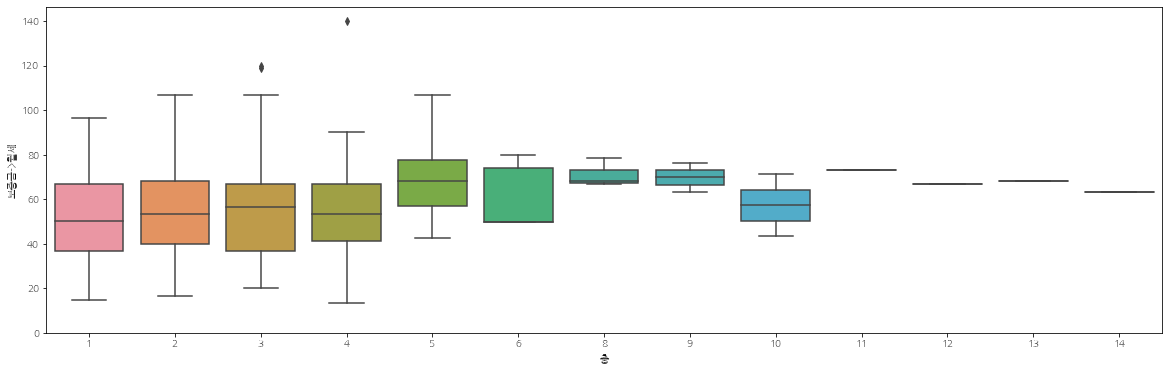

In [ ]:
var = '층'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

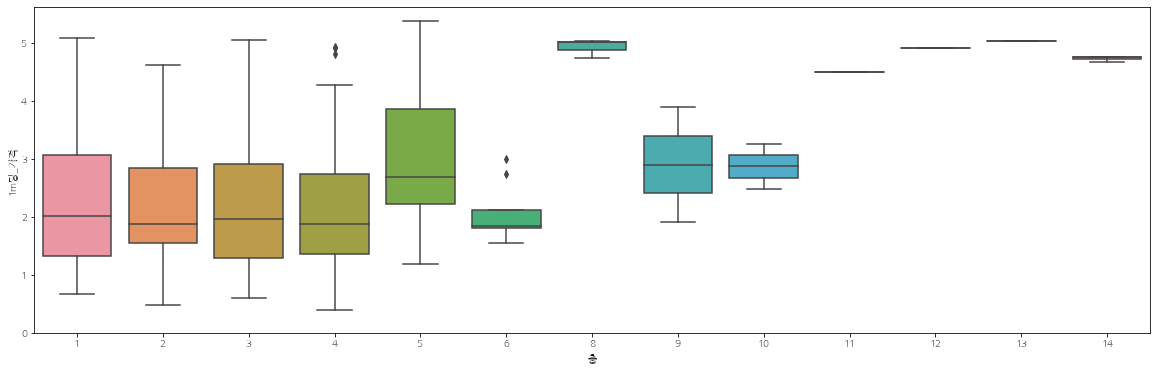

In [ ]:
var = '층'
data = pd.concat([df['1m당_가격'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y='1m당_가격', data=data)
fig.axis(ymin=0);

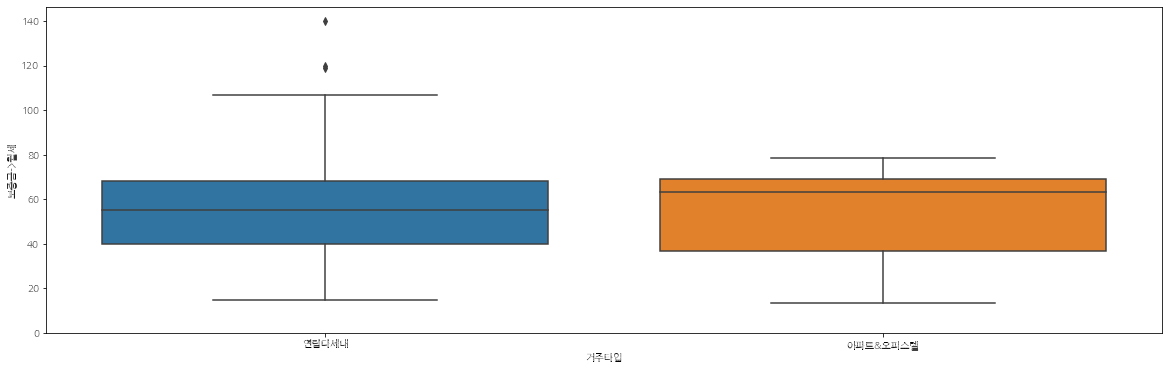

In [ ]:
var = '거주타입'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

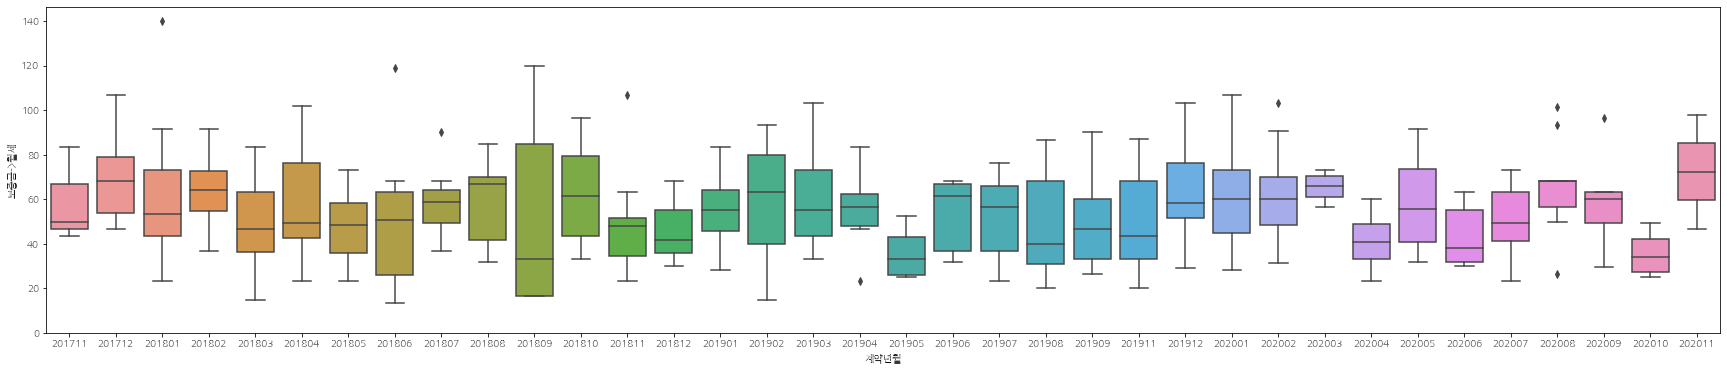

In [ ]:
var = '계약년월'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(30, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

#상자 수염 그림(건축년도)

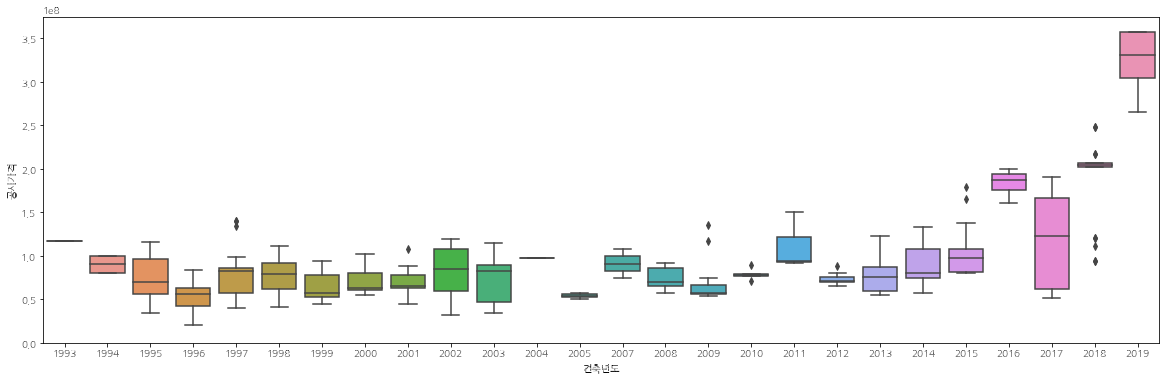

In [ ]:
x_axis = '건축년도'
y_axis = '공시가격'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=x_axis, y=y_axis, data=data)
fig.axis(ymin=0);

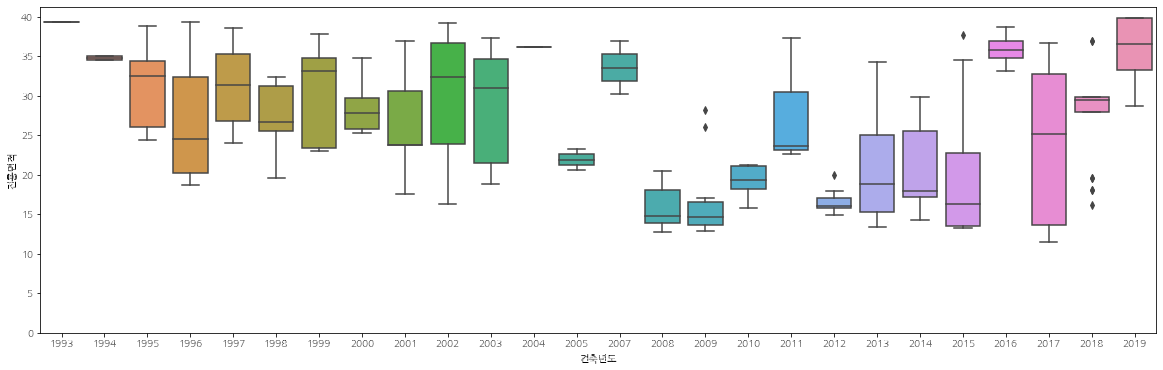

In [ ]:
x_axis = '건축년도'
y_axis = '전용면적'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=x_axis, y=y_axis, data=data)
fig.axis(ymin=0);

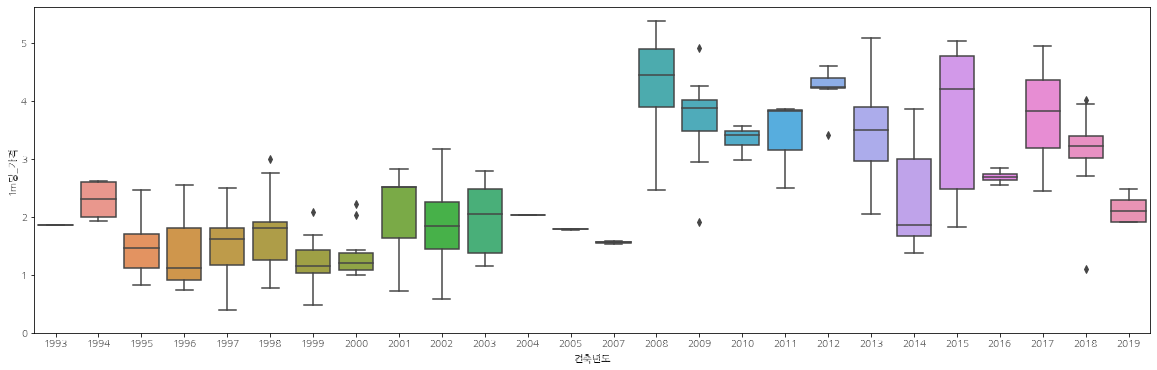

In [ ]:
x_axis = '건축년도'
y_axis = '1m당_가격'
data = pd.concat([df[y_axis], df[x_axis]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=x_axis, y=y_axis, data=data)
fig.axis(ymin=0);

#Correlation matrix

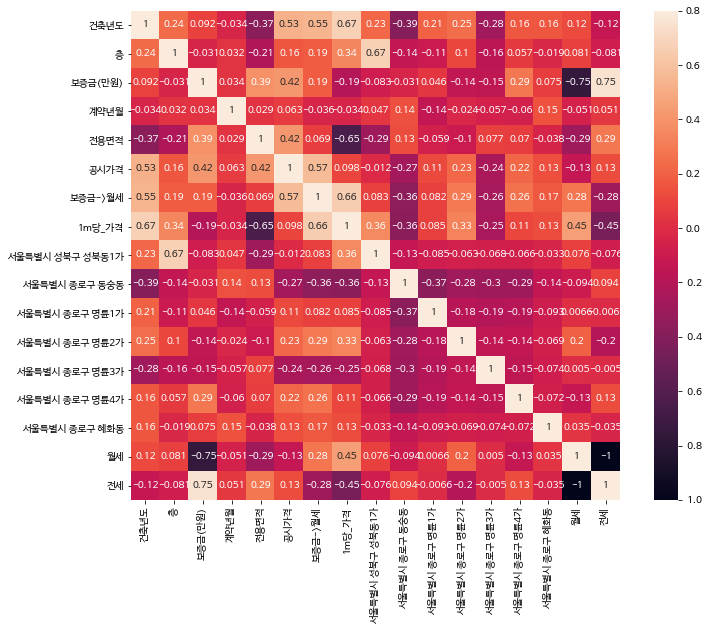

In [19]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

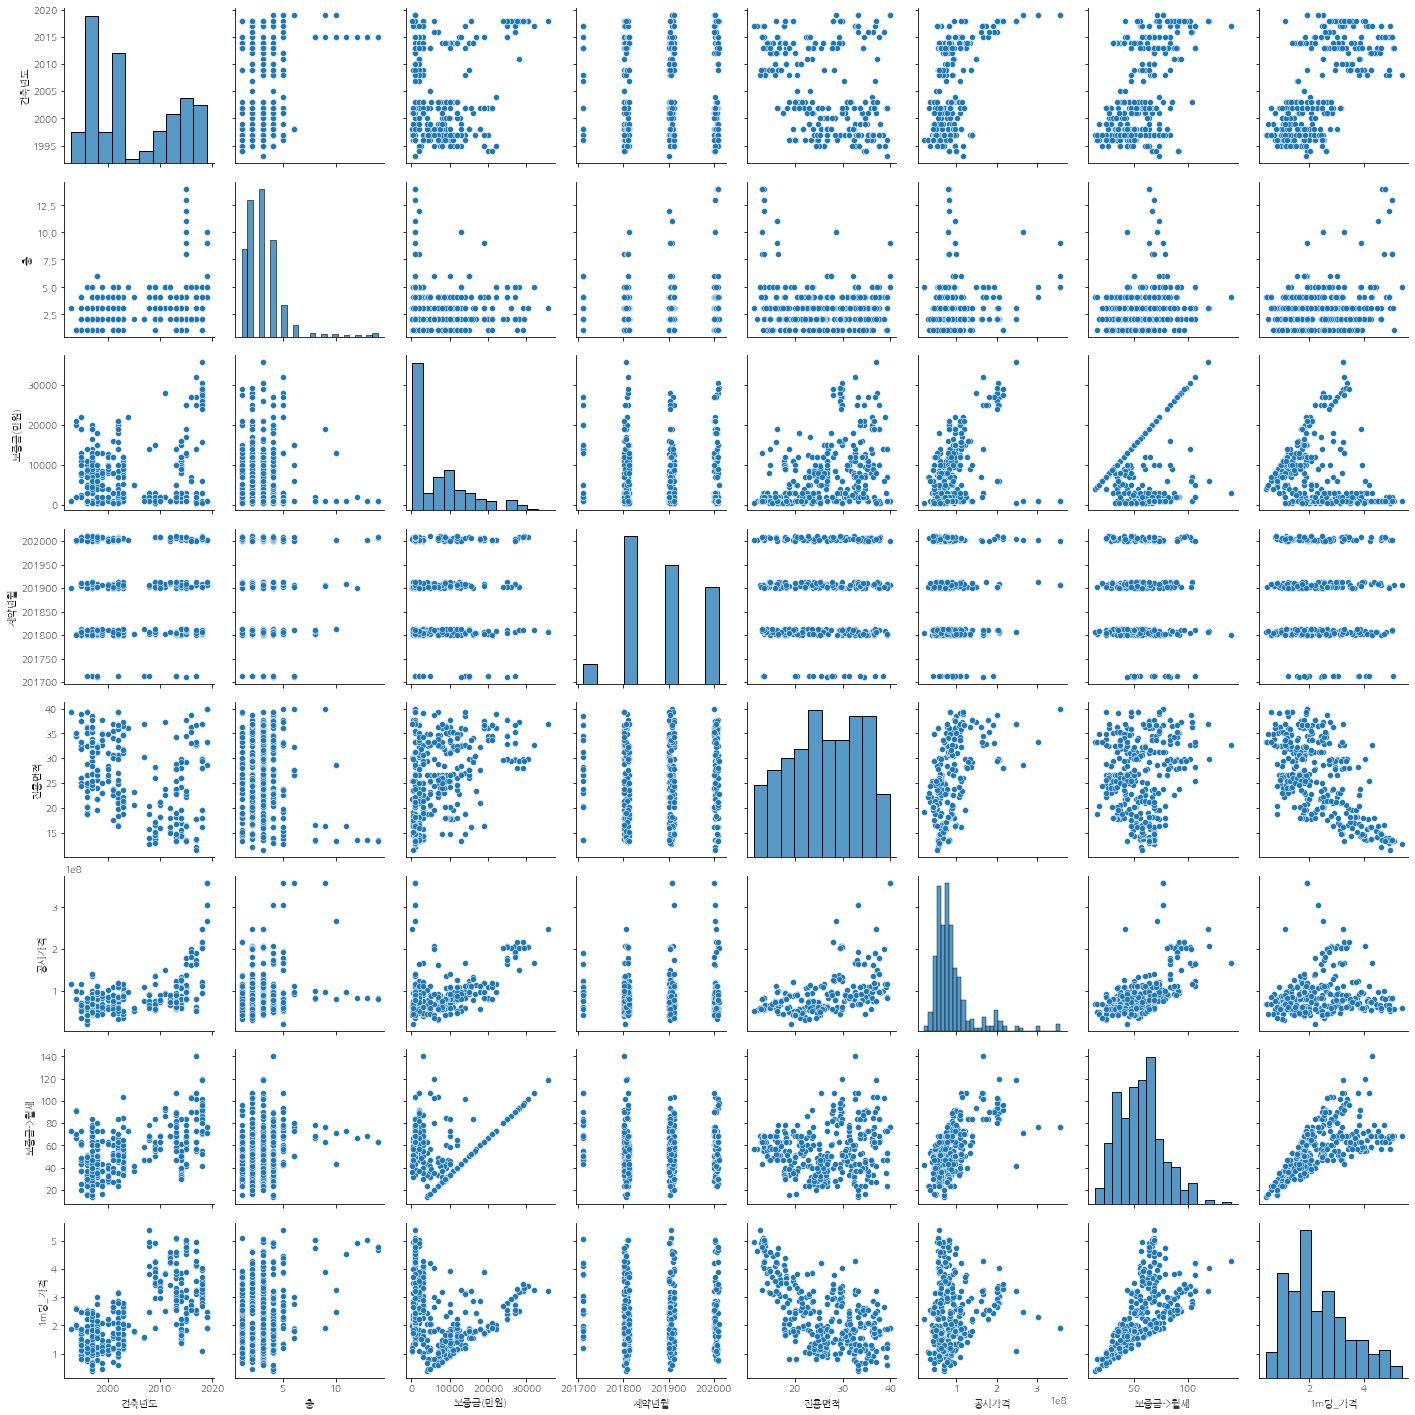

In [ ]:
sns.pairplot(df, size = 2.5)
plt.show();

#Missing Data

In [ ]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
1m당_가격,0,0.0
보증금->월세,0,0.0
공시가격,0,0.0
전용면적,0,0.0
거주타입,0,0.0
전월세구분,0,0.0
계약년월,0,0.0
보증금(만원),0,0.0
층,0,0.0
건축년도,0,0.0


In [ ]:
df = df.drop((missing_data[missing_data['Total'] > 40]).index,1)
df = df.drop(df.loc[df['공시가격'].isnull()].index)
df = df.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df.isnull().sum().max() #just checking that there's no missing data missing...

0

#Outlier

Univariate analysis

In [ ]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df['보증금->월세'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.03422021]
 [-1.95462608]
 [-1.95462608]
 [-1.87503196]
 [-1.87503196]
 [-1.71584372]
 [-1.71584372]
 [-1.55665548]
 [-1.55665548]
 [-1.55665548]]

outer range (high) of the distribution:
[[2.24794354]
 [2.26386237]
 [2.26386237]
 [2.42305061]
 [2.42305061]
 [2.42305061]
 [2.42305061]
 [3.01204711]
 [3.05980358]
 [4.01493305]]


Bivariate analysis

In [ ]:
len(df)

833

In [ ]:
df.sort_values(by = '공시가격', ascending = False)[:20]

In [ ]:
df.sort_values(by = '보증금->월세', ascending = False)[:100]

In [ ]:
df.sort_values(by = '1m당_가격', ascending = False)[:20]

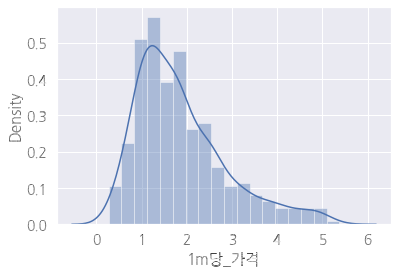

In [ ]:
sns.distplot(df['1m당_가격']);

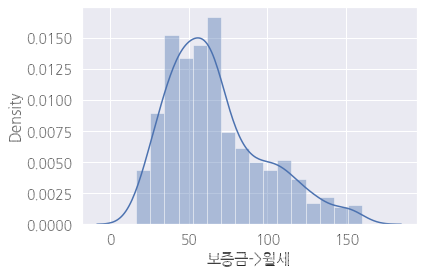

In [ ]:
sns.distplot(df['보증금->월세']);

In [ ]:
#deleting points
df = df.drop(df[df['보증금->월세'] > 160].index)

#Normality

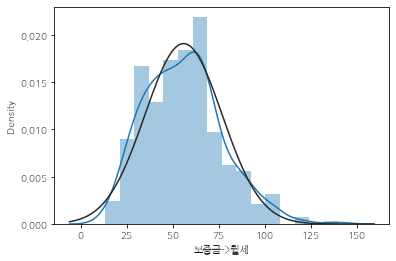

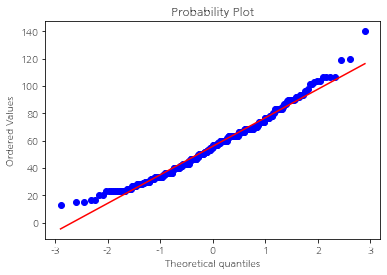

In [ ]:
#histogram and normal probability plot
sns.distplot(df['보증금->월세'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['보증금->월세'], plot=plt)

In [ ]:
#skewness and kurtosis
print("Skewness: {}".format(df['보증금->월세'].skew()))
print("Kurtosis: {}".format(df['보증금->월세'].kurt()))

Skewness: 0.5207112446646254
Kurtosis: 0.3500643576722031


In [ ]:
df['log_보증금->월세'] = np.log(df['보증금->월세'])

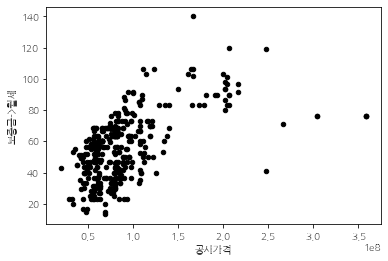

In [ ]:
#scatter plot '공시가격'/'보증금->월세'
var = '공시가격'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='보증금->월세', c=np.array([0, 0, 0]).reshape(1,-1));

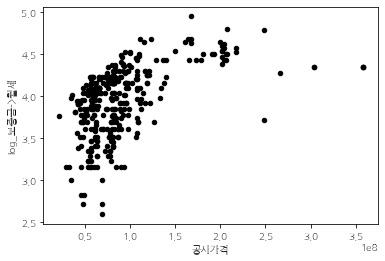

In [ ]:
#scatter plot '공시가격'/'보증금->월세'
var = '공시가격'
data = pd.concat([df['log_보증금->월세'], df[var]], axis=1)
data.plot.scatter(x=var, y='log_보증금->월세', c=np.array([0, 0, 0]).reshape(1,-1));

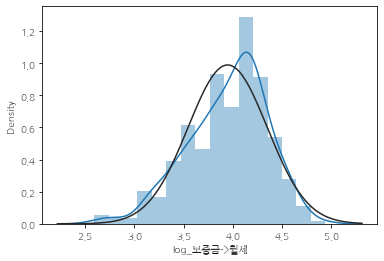

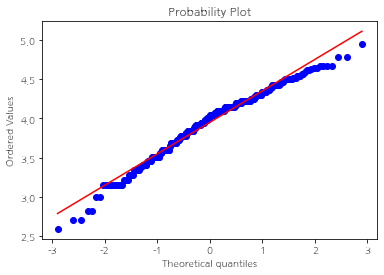

In [ ]:
#histogram and normal probability plot
sns.distplot(df['log_보증금->월세'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['log_보증금->월세'], plot=plt)

In [ ]:
#skewness and kurtosis
print("Skewness: {}".format(df['log_보증금->월세'].skew()))
print("Kurtosis: {}".format(df['log_보증금->월세'].kurt()))

Skewness: -0.54270217362873
Kurtosis: 0.1700629013574657


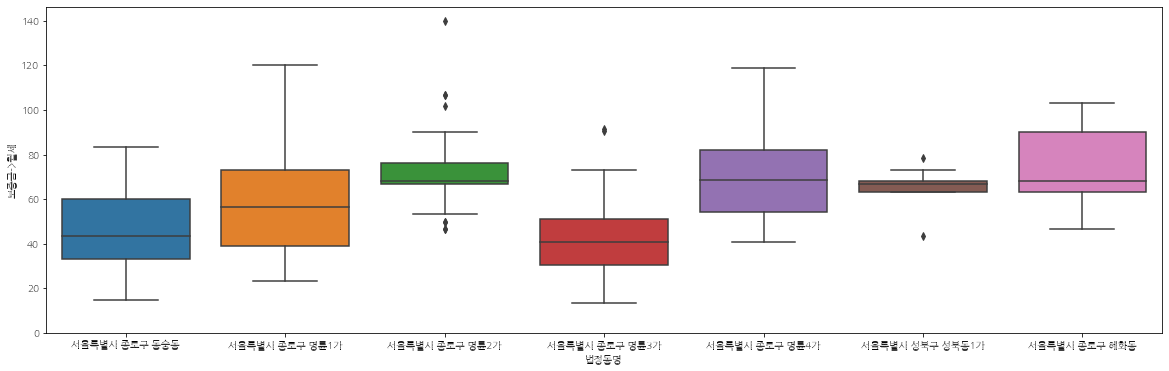

In [ ]:
#box plot overallqual/saleprice
var = '법정동명'
data = pd.concat([df['보증금->월세'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 6))
fig = sns.boxplot(x=var, y="보증금->월세", data=data)
fig.axis(ymin=0);

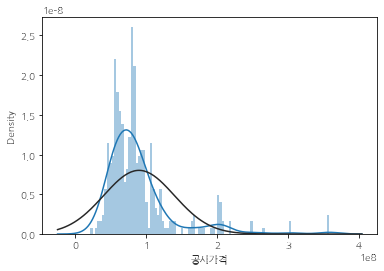

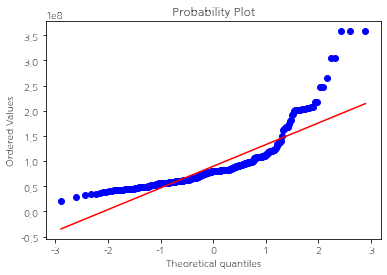

In [ ]:
#histogram and normal probability plot
sns.distplot(df['공시가격'], fit=norm, norm_hist=True, bins=100);
fig = plt.figure()
res = stats.probplot(df['공시가격'], plot=plt)

In [ ]:
df['log_공시가격'] = np.log(df['공시가격'])

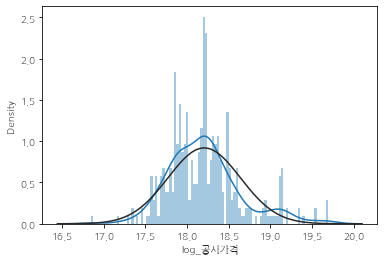

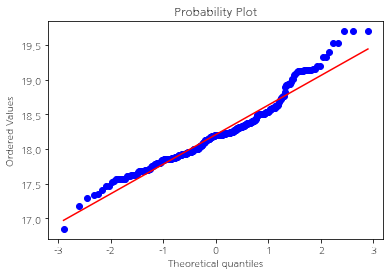

In [ ]:
#histogram and normal probability plot
sns.distplot(df['log_공시가격'], fit=norm, norm_hist=True, bins=100);
fig = plt.figure()
res = stats.probplot(df['log_공시가격'], plot=plt)

In [ ]:
#deleting points
df = df.drop(df[df['log_보증금->월세'] < 2.8].index)

#Homoscedasticity

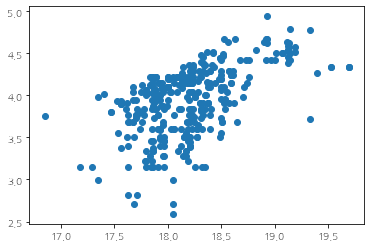

In [ ]:
#scatter plot
plt.scatter(df['log_공시가격'], df['log_보증금->월세']);

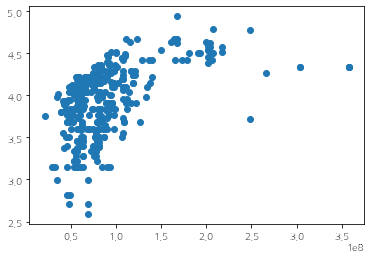

In [ ]:
#scatter plot
plt.scatter(df['공시가격'], df['log_보증금->월세']);

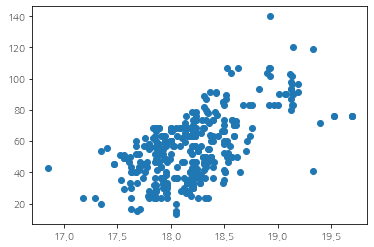

In [ ]:
#scatter plot
plt.scatter(df['log_공시가격'], df['보증금->월세']);

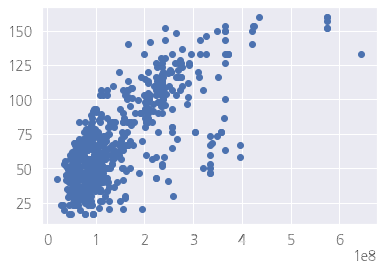

In [ ]:
#scatter plot
plt.scatter(df['공시가격'], df['보증금->월세']);

In [ ]:
df.head(10)

#to_csv

In [ ]:
df.to_csv('/content/gdrive/My Drive/recommend_system/tracer/preprocessed_1.csv', index=False, encoding='cp949')

#Reference

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python